In [24]:
import numpy as np
import imageio
import cv2 as cv
import matplotlib.pyplot as plt
import glob

In [25]:
im = cv.imread('../TEST/03_inf.jpg')
img = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
img.shape, img.dtype

((1536, 2039), dtype('uint8'))

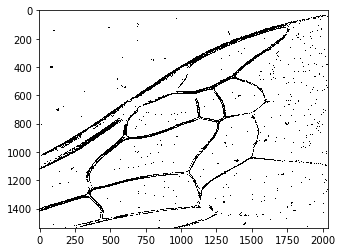

In [26]:
bin_img = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,
            cv.THRESH_BINARY,179,28)
plt.imshow(bin_img, cmap = 'gray')

In [27]:
train_imgs = np.array([np.array(imageio.imread(filename)) for filename in glob.glob('../TRAIN/*.jpg')])
print(train_imgs.shape)

(32,)


(1536, 2039)
(1536, 2039)
(1536, 2039)
(1536, 2039)
(1536, 2039)
(1536, 2039)
(1536, 2039)
(1536, 2039)
(1536, 2048)
(1536, 2048)
(2039, 1536)
(1536, 2039)
(1536, 2039)
(1536, 2039)
(1536, 2039)
(1536, 2039)
(1536, 2039)
(1536, 2039)
(1536, 2039)
(1536, 2039)
(1536, 2048)
(1536, 2039)
(1536, 2039)
(1536, 2039)
(1536, 2039)
(1536, 2048)
(1536, 2039)
(1536, 2039)
(1536, 2048)
(1536, 2039)
(1536, 2039)
(1536, 2039)


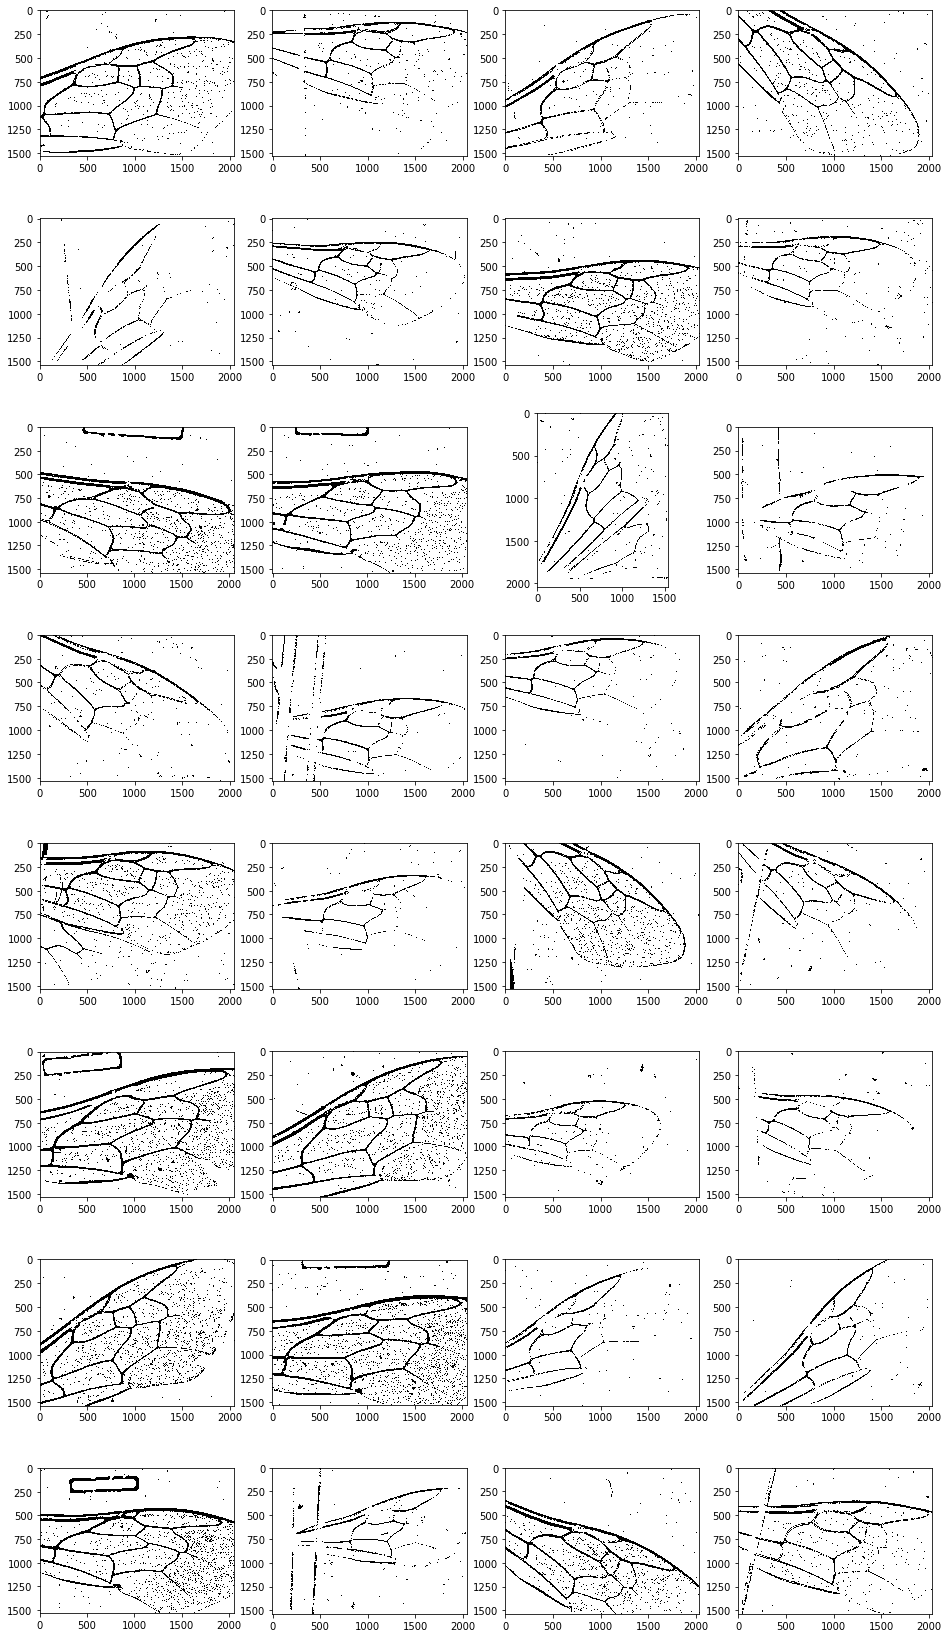

In [30]:
fig=plt.figure(figsize=(16, 30))
bin_imgs = []
for i in range(train_imgs.shape[0]):
    img_gray = cv.cvtColor(train_imgs[i], cv.COLOR_BGR2GRAY)
    print(img_gray.shape)
    binarized = cv.adaptiveThreshold(img_gray, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv.THRESH_BINARY, 179, 28)
    bin_imgs.append(binarized)
    bin_imgs[i] = binarized
    fig.add_subplot(8, 4, i+1)
    plt.imshow(binarized, cmap='gray')
plt.show()

(1536, 2039)


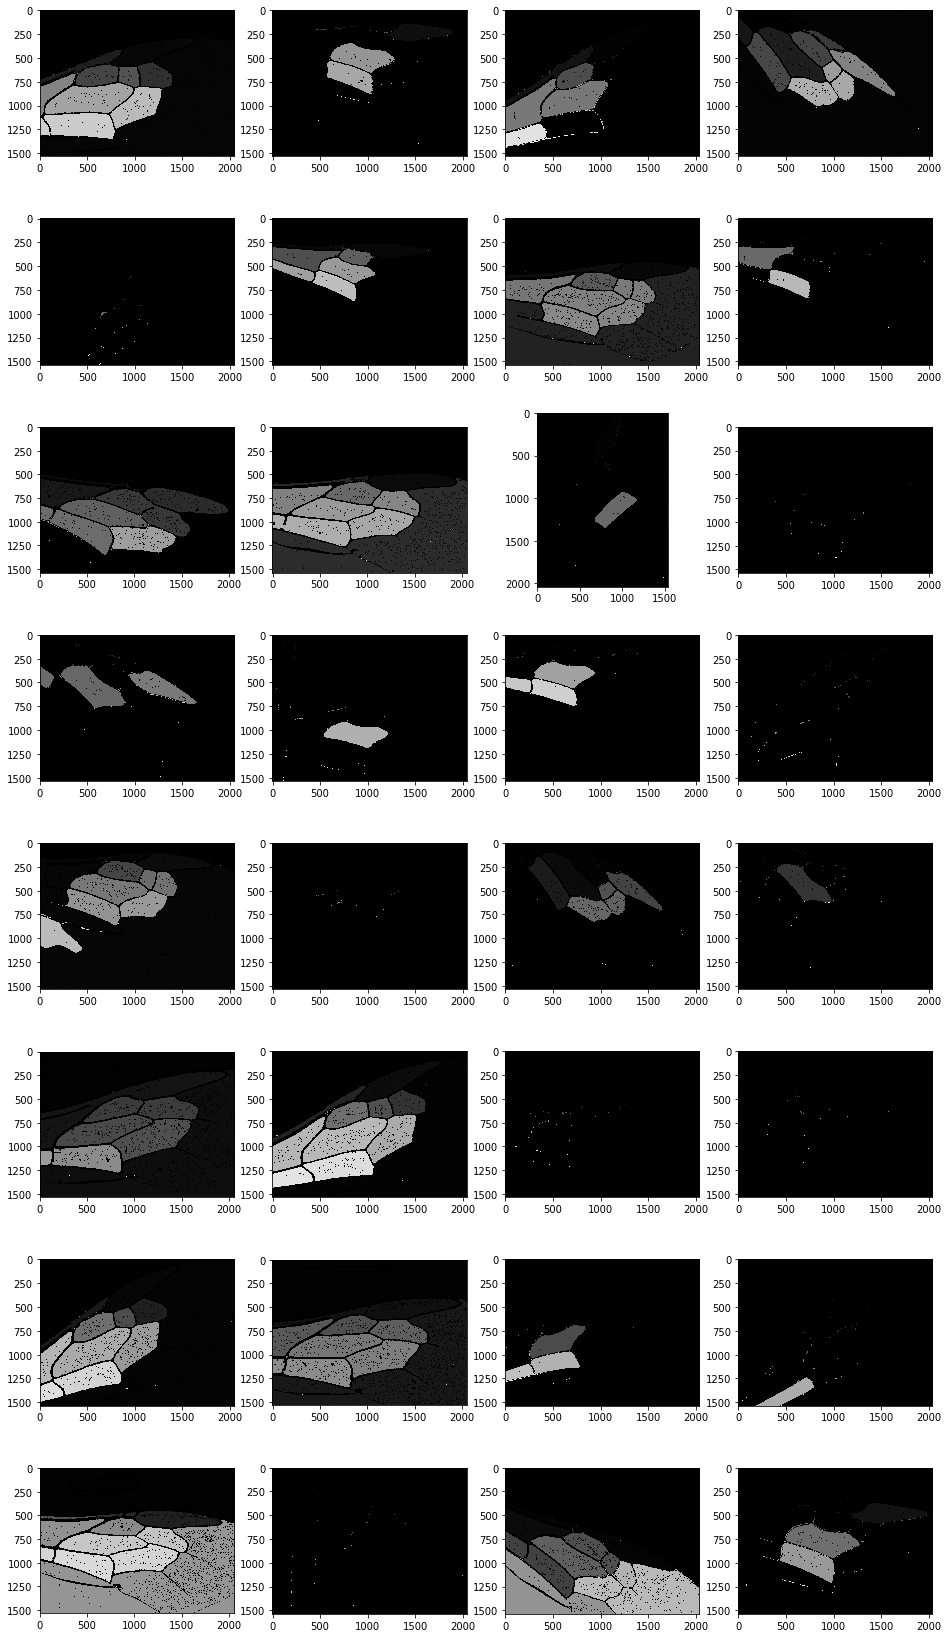

In [39]:
binarized = np.asarray(binarized, dtype=np.uint8)
print(binarized.shape)
fig=plt.figure(figsize=(16, 30))
for i in range(len(bin_imgs)):
    ret, labels = cv.connectedComponents(bin_imgs[i])
    fig.add_subplot(8, 4, i+1)
    plt.imshow(labels, cmap='gray')
plt.show()

In [39]:
kernel = np.array((
        [0, 1, 0],
        [1, -1, 1],
        [0, 1, 0]), dtype="int")

output_image = cv.morphologyEx(img, cv.MORPH_HITMISS, kernel)

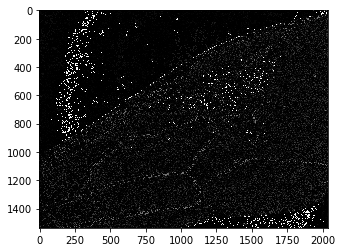

In [9]:
plt.imshow(output_image, cmap= 'gray')